# Decision Trees

#### Instructions:
- Write modular code with relevant docstrings and comments for you to be able to use
functions you have implemented in future assignments.
- All theory questions and observations must be written in a markdown cell of your jupyter notebook.You can alsoadd necessary images in `imgs/` and then include it in markdown. Any other submission method for theoretical question won't be entertained.
- Start the assignment early, push your code regularly and enjoy learning!

### Question 1 Optimal DT from table
**[20 points]**\
We will use the dataset below to learn a decision tree which predicts if people pass machine
learning (Yes or No), based on their previous GPA (High, Medium, or Low) and whether or
not they studied. 

| GPA | Studied | Passed |
|:---:|:-------:|:------:|
|  L  |    F    |    F   |
|  L  |    T    |    T   |
|  M  |    F    |    F   |
|  M  |    T    |    T   |
|  H  |    F    |    T   |
|  H  |    T    |    T   |
    
 For this problem, you can write your answers using $log_2$
, but it may be helpful to note
that $log_2 3 ≈ 1.6$.

---
1. What is the entropy H(Passed)?

  A. Entropy : H(passed) = <br> $=>-2/6*log_2 (2/6) -4/6*log_2 (4/6)$  <br> $=> -1/3*(-1.6) -2/3*(-0.6)$ <br> $=0.9333$

2. What is the entropy H(Passed | GPA)?

 A. Entropy H(Passed | GPA) : <br>
 $=> H(Passed|GPA=L) = -1/2*log_2 (1/2) -1/2*log_2 (1/2) = 1$ <br>
 $=> H(Passed|GPA=M) = -1/2*log_2 (1/2) -1/2*log_2 (1/2)=1 $ <br>
 $=> H(Passed | GPA=H) = -2/2*log_2(2/2) -0 =0$ <br>
 Therefore H(Passed |GPA)$= 2/6*H(Passed | GPA=L) +2/6*H(Passed|GPA=M) +2/6*H(Passed|GPA=H)$ <br>
  $= 1/3+1/3+0$<br>$=2/3$


3. What is the entropy H(Passed | Studied)?

  A. Entropy H(Passed | Studied) : <br>
 $=> H(Passed|Studied=T) = -3/3*log_2 (3/3) -0 = 0$ <br>
 $=> H(Passed|Studied=F) = -1/3*log_2 (1/3) -2/3*log_2 (2/3)= -1/3*(-1.6) -2/3*(-0.6)= 0.9333$ <br>
 Therefore H(Passed |Studied)$= 3/6*H(Passed | Studied=T) +3/6*H(Passed|Studied=F)$ <br>
  $= 0+1/2*0.933$<br>$=0.4665$
  
4. Draw the full decision tree that would be learned for this dataset. You do
not need to show any calculations.

![Decision tree](imgs/dtree_1.JPG)

---

### Question 2 DT loss functions
**[10 points]**
1. Explain Gini impurity and Entropy. 
2. What are the min and max values for both Gini impurity and Entropy
3. Plot the Gini impurity and Entropy for $p\in[0,1]$.
4. Multiply Gini impurity by a factor of 2 and overlay it over entropy.

### Question 3 Training a Decision Tree  
**[40 points]**

You can download the spam dataset from the link given below. This dataset contains feature vectors and the lables of Spam/Non-Spam mails. 
http://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data

**NOTE: The last column in each row represents whether the mail is spam or non spam**\
Although not needed, incase you want to know what the individual columns in the feature vector means, you can read it in the documentation given below.
http://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.DOCUMENTATION

**Download the data and load it from the code given below**

In [ ]:
import numpy as np
f=open("spambase.data")
l=[]
labels=[]
for i in f.readlines():
  i=i[:-1].split(",")
  labels.append(int(i[-1]))
  i=list(map(lambda x: float(x) if "." in x else int(x),i[:-1]))
  l.append(i)
arr=np.array(l)
labels=np.array(labels)



You can try to normalize each column (feature) separately with wither one of the following ideas. **Do not normalize labels**.
- Shift-and-scale normalization: substract the minimum, then divide by new maximum. Now all values are between 0-1
- Zero mean, unit variance : substract the mean, divide by the appropriate value to get variance=1.

1. Split your data into train 80% and test dataset 20% 
2. **[BONUS]** Visualize the data using PCA . You can reduce the dimension of the data if you want. Bonus marks if this increases your accuracy.

*NOTE: If you are applying PCA or any other type of dimensionality reduction, do it before splitting the dataset*

In [ ]:

#######################
from sklearn.model_selection import  train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(arr,labels,test_size=0.2)
#######################


You need to perform a K fold validation on this and report the average training error over all the k validations. 
- For this , you need to split the training data into k splits.
- For each split, train a decision tree model and report the training , validation and test scores.
- Report the scores in a tabular form for each validation

In [ ]:
# Initialize K and split the data
# print(len(arr))
class KFolds:

  def __init__(self,k):
    self.k=k

  
  def get_splits(self,x):

    x=np.array(x)
    splits=[];length=len(x)//self.k
    for i in range(self.k-1):
      splits.append(list(range(i*length,(i+1)*length)))
    splits.append(list(range((self.k-1)*length,len(x))))

    train_indices=[];test_indices=[]

    for i in range(len(splits)):
      test_indices.append(splits[i])
      li=[];indices=splits[:i]+splits[i+1:]
      for j in indices:
        li+=j
      train_indices.append(li)

    return (train_indices,test_indices)

k=20
kf=KFolds(k)
tr,ts=kf.get_splits(xtrain)
from sklearn.tree import DecisionTreeClassifier

def accuracy(ypred,ytest):
  acc=0
  for i in range(len(ypred)):
    acc+=(ypred[i]==ytest[i])
  return acc/len(ypred)

def error(ytr,ypred):
  e=0
  for i in range(len(ypred)):
    e+=(ypred[i]!=ytr[i])
  return e/len(ytr)


#Run the K fold Validation and report the scores

#######################

table=[]
err,ferr=0,0
for i in range(k):
  
  xtr=xtrain[tr[i],:]
  ytr=ytrain[tr[i]]

  xtes=xtrain[ts[i],:]
  ytes=ytrain[ts[i]]

  clf = DecisionTreeClassifier(random_state=0)
  clf.fit(xtr,ytr)

  err+=error(clf.predict(xtr),ytr)
  tr_score=accuracy(ytr,clf.predict(xtr))
  ypr=clf.predict(xtes)
  val_score=accuracy(ypr,ytes)
  ypred=clf.predict(xtest)
  test_score=accuracy(ypred,ytest)
  table.append(["Validation {}".format(i+1),tr_score,val_score,test_score])

print("Average training error :",err/k)
import pandas as pd
table=pd.DataFrame(table)
table.columns=["fold","Training accuracy","Validation accuracy","Testing accuracy"]
table.set_index("fold",inplace=True)
table


#######################


Average training error : 0.0002574370709382151


,Training accuracy,Validation accuracy,Testing accuracy
fold,,,
Validation 1,0.999714,0.902174,0.912052
Validation 2,0.999714,0.913043,0.916395
Validation 3,0.999714,0.891304,0.927253
Validation 4,0.999714,0.902174,0.915309
Validation 5,0.999714,0.913043,0.921824
Validation 6,0.999714,0.913043,0.922910
Validation 7,0.999714,0.913043,0.918567
Validation 8,0.999714,0.907609,0.916395
Validation 9,0.999714,0.913043,0.922910


### Question 4 Random Forest Algorithm
**[30 points]**

1. What is boosting, bagging and  stacking?
Which class does random forests belong to and why? **[5 points]**

2. Implement random forest algorithm using different decision trees. **[25 points]** 

In [ ]:
from sklearn.tree import DecisionTreeClassifier
import math
import numpy as np
from scipy import stats
def sampledata(x,y):
  choices = np.random.choice(range(len(x)), size=len(x), replace=True)
  return (x[choices,:],y[choices])

def samplefeatures(x):
  features=np.random.choice(range(x.shape[1]), size=int(math.sqrt(x.shape[1])), replace=False)
  return (x[:,features],features)


def random_forest_algorithm(x,y,k): # Pass necessary params as per requirements
    #######################
    numtrees=k
    clfs=[];feas=[]
    for i in range(numtrees):
      new_x,new_y=sampledata(x,y)
      new_x,fea=samplefeatures(new_x)
      feas.append(fea)

      clf= DecisionTreeClassifier(random_state=0)
      clf.fit(new_x,new_y)
      clfs.append(clf)
    return clfs,feas

def voting(pred):
  m = stats.mode(pred)
  return m[0][0]

def predict(clfs,features,x):
  tab=[]
  for i in range(len(clfs)):
    new_x=x[:,features[i]]
    ypred=clfs[i].predict(new_x)
    tab.append(ypred)
  tab=np.array(tab)
  ypred=voting(tab)
  return ypred


num_trees=100
clf,features=random_forest_algorithm(xtrain,ytrain,num_trees)
ypred=predict(clf,features,xtest)
print("Accuracy of the model using 100 trees is :",accuracy(ypred,ytest))



    # Your code goes here #
    #######################

Accuracy of the model using 100 trees is : 0.8838219326818675


Text(0, 0.5, 'Accuracy')

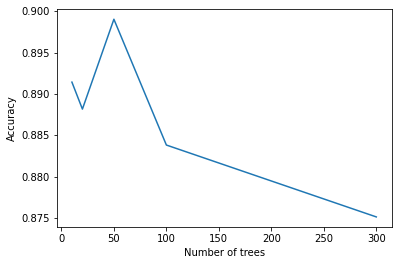

In [ ]:
import matplotlib.pyplot as plt
num=[10,20,50,100,200,300]
acc=[]
for i in num:
  clf,features=random_forest_algorithm(xtrain,ytrain,100)
  ypred=predict(clf,features,xtest)
  acc.append(accuracy(ytest,ypred))

plt.plot(num,acc)
plt.xlabel("Number of trees")
plt.ylabel("Accuracy")